## **Exploratory data analysis**

**Dataset**: [Current_available_property_sale](https://dagshub.com/Omdena/ParisFranceChapter_HousingAffordabilityAnalysis/src/development/src/data/Current_available_property_sale.csv)


We perform in-depth EDA on a dataset containing information about properties available for sale. The primary goal is to uncover patterns, relationships, and insights that can inform better understanding of the property market. Key features include property size, total rooms, number of bedrooms, number of bathrooms, and property prices.

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load data**

In [2]:
data = pd.read_csv('Current_available_property_sale.csv')
data.head()

,Property_name,Property_type,Property_size,Total_rooms,Bedrooms,Bathrooms,Location,Price(Euros)
0,Montmartre - Sacré-coeur - Perfect pied-à-terr...,Apartments,39,3.0,1.0,1.0,"Paris, Ile-De-France, 75018 France",589999
1,Renovated flat with open view - Paris 4th - Ma...,Apartments,41,2.0,1.0,1.0,"Paris, Ile-De-France, 75004 France",585000
2,Saint-Germain-des-Prés / rue Cassette,Apartments,37,NaN,1.0,2.0,"Paris, Ile-De-France, 75006 France",580000
3,Paris 8 - Champs-Elysées - Deux pièces - Derni...,Apartments,45,2.0,1.0,2.0,"Paris, Ile-De-France, 75008 France",580000
4,Saint-Germain-des-Prés,Apartments,28,NaN,1.0,2.0,"Paris, Ile-De-France, 75006 France",560000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_name  580 non-null    object 
 1   Property_type  468 non-null    object 
 2   Property_size  564 non-null    object 
 3   Total_rooms    446 non-null    float64
 4   Bedrooms       553 non-null    float64
 5   Bathrooms      488 non-null    float64
 6   Location       581 non-null    object 
 7   Price(Euros)   580 non-null    object 
dtypes: float64(3), object(5)
memory usage: 36.4+ KB


**Converting Columns to Appropriate Types**

We convert the Property_size and Price(Euros) columns to numeric types after removing any non-numeric characters.

In [4]:
# Converting columns to appropriate types
data['Property_size'] = pd.to_numeric(data['Property_size'].str.replace('[^0-9]', ''), errors='coerce')
data['Price(Euros)'] = pd.to_numeric(data['Price(Euros)'].str.replace('[^0-9]', ''), errors='coerce')

**Missing Values**

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Property_name      1
Property_type    113
Property_size    215
Total_rooms      135
Bedrooms          28
Bathrooms         93
Location           0
Price(Euros)     216
dtype: int64

**Handling Missing Values**

- For Property_type, we use the most frequent value (mode) as the substitute.
- For Property_size, Total_rooms, Bedrooms, Bathrooms, and Price(Euros), we use the mean value to fill the missing entries.

In [6]:
# We fill missing numerical values with the mean and categorical with the mode
data['Property_type'].fillna(data['Property_type'].mode()[0], inplace=True)
data['Property_size'].fillna(data['Property_size'].mean(), inplace=True)
data['Total_rooms'].fillna(data['Total_rooms'].mean(), inplace=True)
data['Bedrooms'].fillna(data['Bedrooms'].mean(), inplace=True)
data['Bathrooms'].fillna(data['Bathrooms'].mean(), inplace=True)
data['Price(Euros)'].fillna(data['Price(Euros)'].mean(), inplace=True)

In [7]:
# Dropping rows where 'Property_name' is missing
data.dropna(subset=['Property_name'], inplace=True)

# Verify changes
missing_values_after = data.isnull().sum()
missing_values_after

Property_name    0
Property_type    0
Property_size    0
Total_rooms      0
Bedrooms         0
Bathrooms        0
Location         0
Price(Euros)     0
dtype: int64

**Convert data types**

We convert the data types of the variables to float to ensure consistency and correctness.
- Each variable (Property_size, Total_rooms, Bedrooms, Bathrooms, Price(Euros)) is first rounded to the nearest whole number and then converted to float.


In [8]:
# Convert data types
data['Property_size'] = data['Property_size'].round().astype(float)
data['Total_rooms'] = data['Total_rooms'].round().astype(float)
data['Bedrooms'] = data['Bedrooms'].round().astype(float)
data['Bathrooms'] = data['Bathrooms'].round().astype(float)
data['Price(Euros)'] = data['Price(Euros)'].round().astype(float)

In [9]:
# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_name  580 non-null    object 
 1   Property_type  580 non-null    object 
 2   Property_size  580 non-null    float64
 3   Total_rooms    580 non-null    float64
 4   Bedrooms       580 non-null    float64
 5   Bathrooms      580 non-null    float64
 6   Location       580 non-null    object 
 7   Price(Euros)   580 non-null    float64
dtypes: float64(5), object(3)
memory usage: 40.8+ KB


**Summary Statistics**

In [10]:
#Key statistics
data.describe()

,Property_size,Total_rooms,Bedrooms,Bathrooms,Price(Euros)
count,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,139.903448,4.231034,2.581034,2.784483,2.827848e+06
std,79.397370,2.196339,1.495642,1.634082,2.781940e+06
min,21.000000,1.000000,0.000000,1.000000,3.290000e+05
25%,94.750000,3.000000,2.000000,2.000000,1.493750e+06
50%,140.000000,4.000000,2.000000,3.000000,2.827848e+06
75%,140.000000,5.000000,3.000000,3.000000,2.827848e+06
max,848.000000,20.000000,15.000000,14.000000,3.800000e+07


**1. Property Size**:

- The average property size is around 140 sqm.
- Sizes range from 21 sqm to 848 sqm, indicating a wide variety of property sizes.
- There is significant variability in sizes, as shown by a standard deviation of 79 sqm.
- The distribution is roughly symmetric, with the mean and median both around 140 sqm.

**2. Total Rooms:**

- Properties have an average of about 4.3 rooms.
- The number of rooms ranges from 1 to 20, suggesting a wide range in property sizes.
- The standard deviation is approximately 2.2 rooms, indicating moderate variability.
- Both the mean and median are around 4 rooms, showing a roughly symmetric distribution.

**3. Bedrooms:**

- On average, properties have around 2.6 bedrooms.
- The number of bedrooms ranges from 0 to 15, indicating diverse property sizes, including studios and large homes.
- Bedrooms have a standard deviation of about 1.5, showing moderate variability.
- The median number of bedrooms is 2, indicating that half of the properties have 2 or fewer bedrooms.

**4. Bathrooms:**
- Properties have an average of about 2.7 bathrooms.
- The number of bathrooms ranges from 1 to 14, showing a wide variety in property sizes and luxury levels.
- Bathrooms have a standard deviation of about 1.6, indicating moderate variability.
- The median number of bathrooms is around 2.7, with the distribution roughly symmetric around the mean.

**5. Price (Euros):**

- The average property price is approximately 2.83 million Euros.
- Prices range from 329,000 Euros to 38 million Euros, indicating a wide range in property values.
- The standard deviation is very high at about 2.78 million Euros, showing substantial variability.
- Both the mean and median prices are around 2.83 million Euros, indicating a roughly symmetric distribution.

**Outliers - Visual inspection**

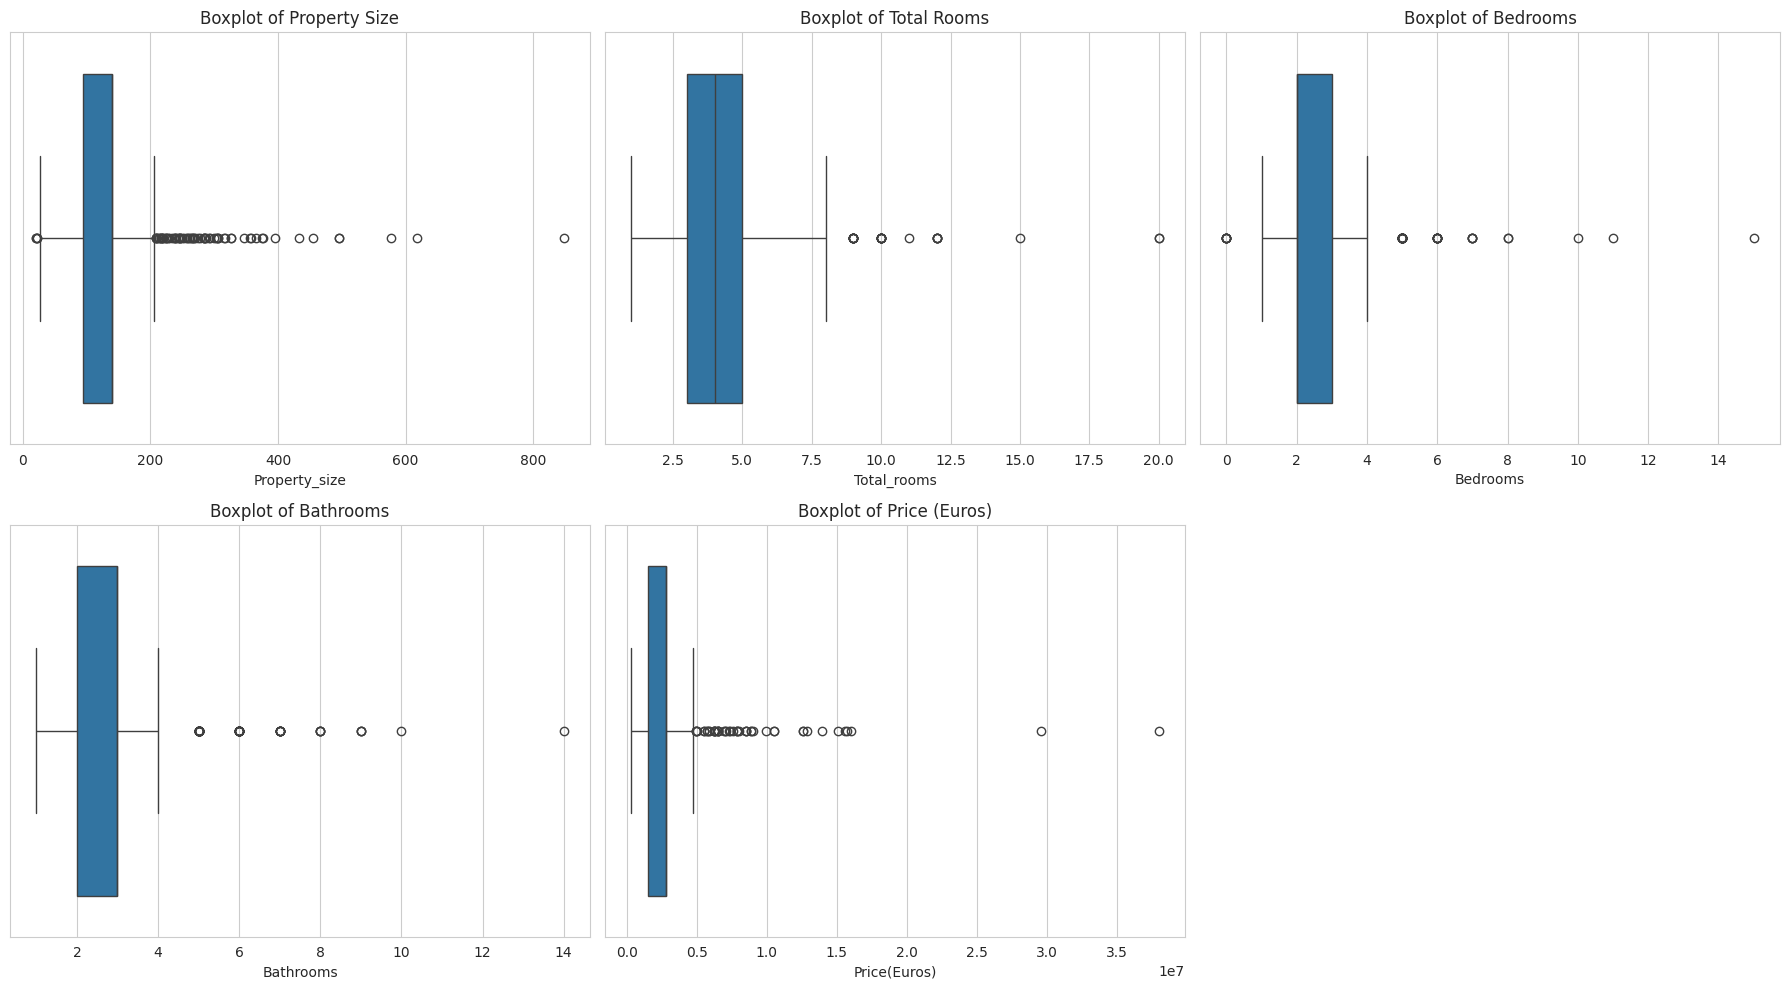

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visual detection of outliers for all variables using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Boxplot for Property_size
sns.boxplot(ax=axes[0, 0], x=data['Property_size'])
axes[0, 0].set_title('Boxplot of Property Size')

# Boxplot for Total_rooms
sns.boxplot(ax=axes[0, 1], x=data['Total_rooms'])
axes[0, 1].set_title('Boxplot of Total Rooms')

# Boxplot for Bedrooms
sns.boxplot(ax=axes[0, 2], x=data['Bedrooms'])
axes[0, 2].set_title('Boxplot of Bedrooms')

# Boxplot for Bathrooms
sns.boxplot(ax=axes[1, 0], x=data['Bathrooms'])
axes[1, 0].set_title('Boxplot of Bathrooms')

# Boxplot for Price(Euros)
sns.boxplot(ax=axes[1, 1], x=data['Price(Euros)'])
axes[1, 1].set_title('Boxplot of Price (Euros)')

# Remove the last empty plot
fig.delaxes(axes[1, 2])

# Display the plots
plt.tight_layout()
plt.show()


**1. Property Size:**

- The majority of property sizes are concentrated below approximately 200 sqm, with most sizes within a smaller range as indicated by the narrow IQR.
- Several outliers above 200 sqm suggest the presence of exceptionally large properties. These outliers extend up to 848 sqm, significantly larger than the main distribution.

**2. Total Rooms:**

- Most properties have between 2 and 6 rooms.
- Outliers with more than 6 rooms extend up to 20 rooms, indicating a few properties with a large number of rooms, likely multi-story or luxury properties.

**3. Bedrooms:**
- The typical property has between 1 and 4 bedrooms, with the IQR showing a central tendency between 1 and 3 bedrooms.
- Properties with more than 4 bedrooms extend up to 14 bedrooms, suggesting some large, possibly multi-family or luxury properties.

**4. Bathrooms:**
- Most properties have between 1 and 4 bathrooms, with the central 50% (IQR) ranging from 1 to 3 bathrooms.
- Several properties have more than 4 bathrooms, extending up to 14, indicating luxury properties with extensive bathroom facilities.

**5. Price (Euros):**
- Property prices are concentrated below approximately 4 million Euros, with the IQR indicating most properties fall within a smaller price range.
- Prices extend up to 38 million Euros, showing a few very high-end properties significantly higher than the majority of the market.

**Handling outliers**

We use the Interquartile Range (IQR) method to handle outliers by capping extreme values at calculated bounds, preserving dataset size and reducing outlier impact.

In [12]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns = ['Property_size', 'Total_rooms', 'Bedrooms', 'Bathrooms', 'Price(Euros)']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    data = cap_outliers(data, column)


**Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

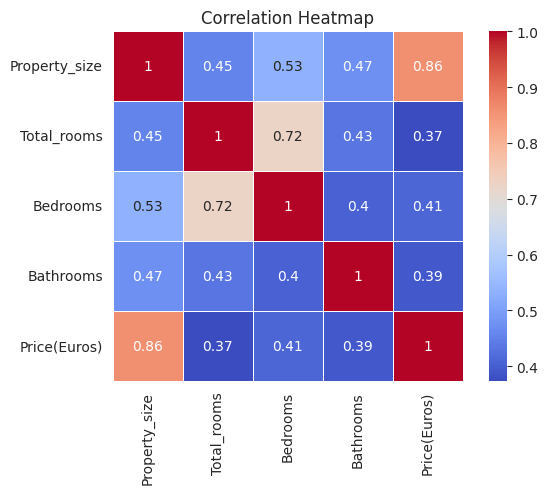

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Heatmap to show correlation between numeric variables
plt.subplot(2, 2, 1)
corr_matrix = data[['Property_size', 'Total_rooms', 'Bedrooms', 'Bathrooms', 'Price(Euros)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')

- **Strongest Correlation**: Property size and price have the strongest relationship.
- **Moderate Correlations**: The number of rooms, bedrooms, and bathrooms are moderately correlated with each other.
-**Weak Correlations**: Price has weaker correlations with the number of rooms, bedrooms, and bathrooms compared to property size.

**Histograms**

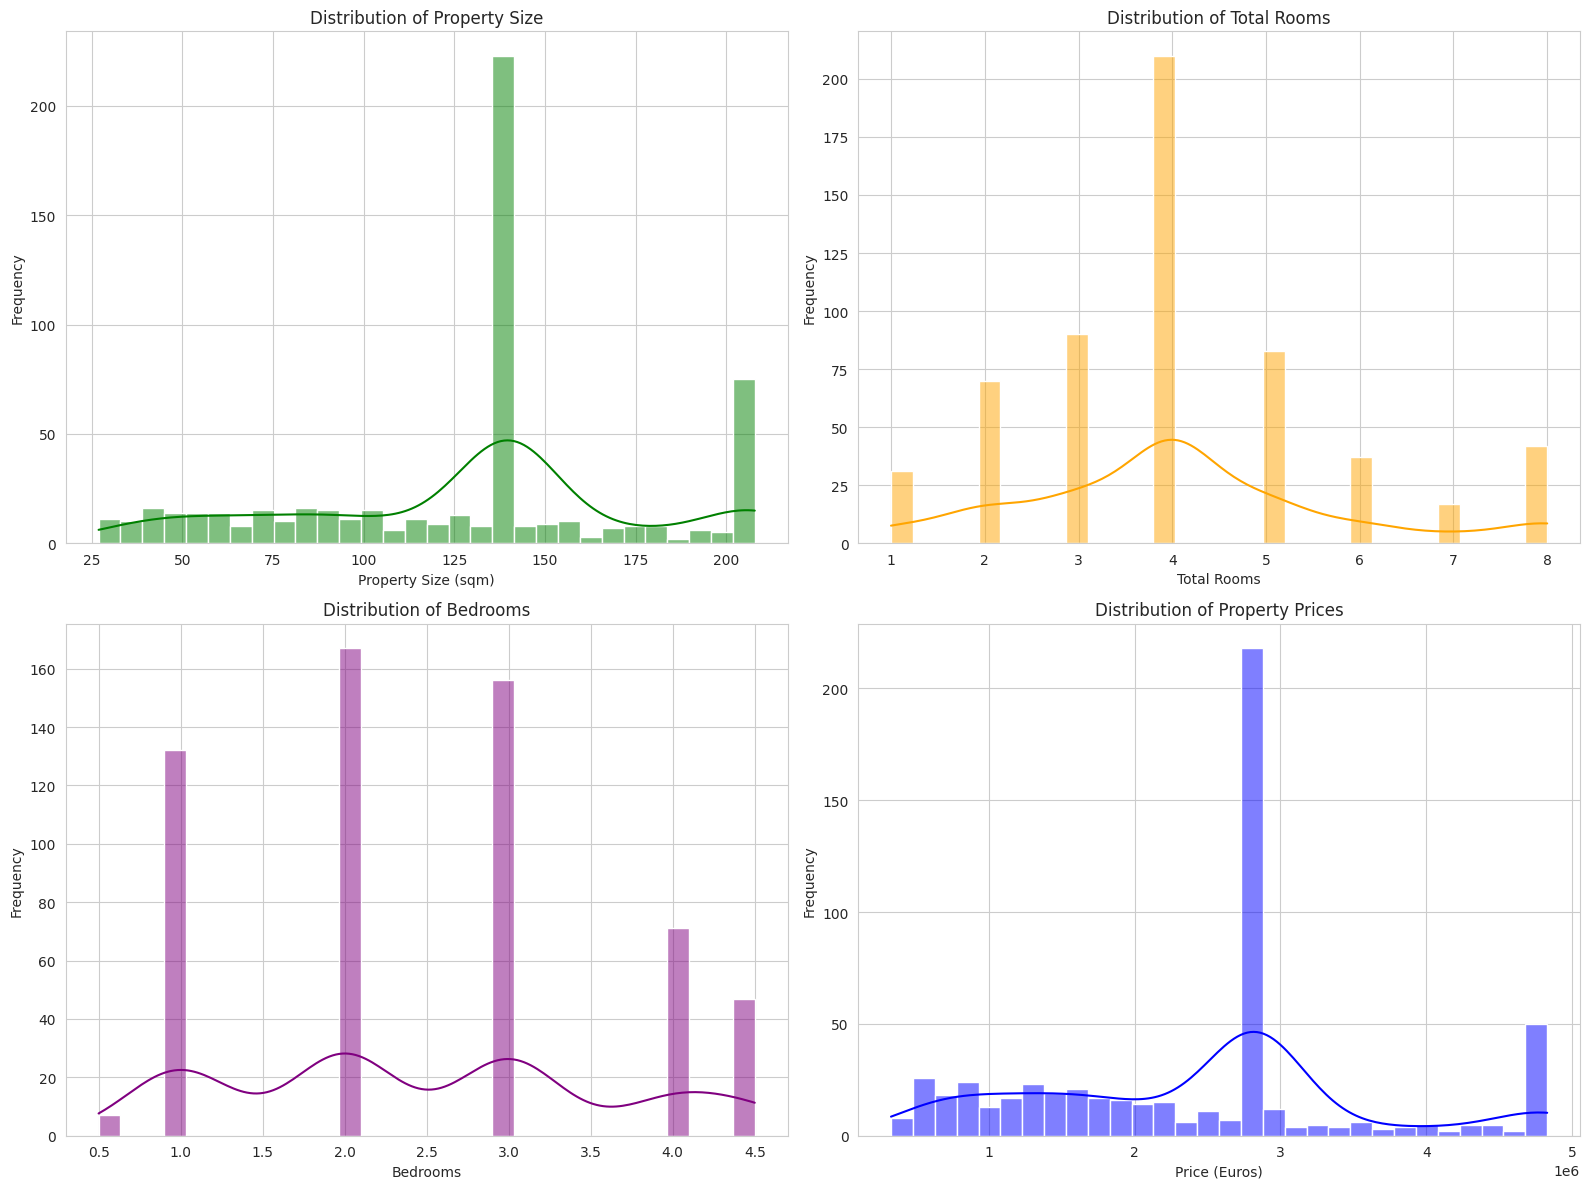

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Distribution of Property Size
plt.subplot(2, 2, 1)
sns.histplot(data['Property_size'], bins=30, kde=True, color='green')
plt.title('Distribution of Property Size')
plt.xlabel('Property Size (sqm)')
plt.ylabel('Frequency')

# Distribution of Total Rooms
plt.subplot(2, 2, 2)
sns.histplot(data['Total_rooms'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')

# Distribution of Bedrooms
plt.subplot(2, 2, 3)
sns.histplot(data['Bedrooms'], bins=30, kde=True, color='purple')
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

# Distribution of Prices
plt.subplot(2, 2, 4)
sns.histplot(data['Price(Euros)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**1. Property Size:**
- The majority of properties are centered around 140 sqm.
- There is a sharp peak at 140 sqm, indicating that this is a very common property size. The distribution shows fewer properties as the size deviates from this peak, both smaller and larger.

**2. Total Rooms:**
- Properties most commonly have 4 rooms.
- The histogram shows clear peaks at 1, 2, 3, and 4 rooms. There is a noticeable drop in frequency for properties with more than 4 rooms, indicating they are less common.

**3. Bedrooms:**
- The most frequent number of bedrooms in properties is 2.
- Properties with 0, 1, 4, 5, and 6 bedrooms are less frequent, indicating a preference for 2-bedroom properties in this dataset.

**4. Property Prices:**
- Property prices are most commonly around 3 million Euros.
- There is a sharp peak at around 3 million Euros, with prices ranging from approximately 0.5 million to 5 million Euros. The distribution indicates that while most properties cluster around 3 million Euros, there is a significant range of prices, reflecting variability in property features and market segments.

Most properties in the dataset tend to be around 140 sqm, have 4 rooms, and 2 bedrooms, priced around 3 million Euros.